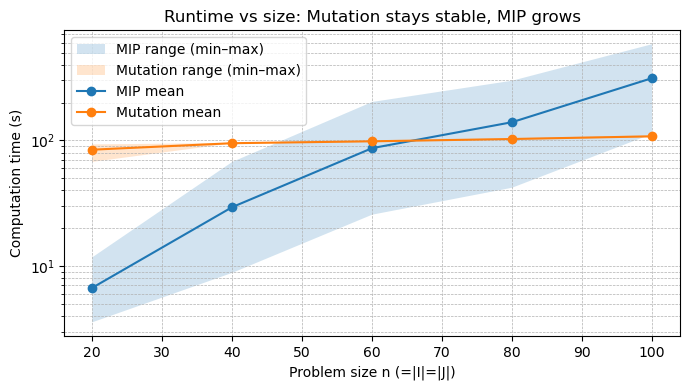

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- data ----------
data = [
("20-20-2-2",0.502,0.526,4.85,0.541,67.37),
("20-20-3-2",0.606,0.629,11.71,0.635,92.77),
("20-20-2-3",0.409,0.447,3.56,0.434,92.57),
("40-40-2-2",0.503,0.537,12.17,0.539,95.16),
("40-40-3-2",0.604,0.627,67.25,0.634,94.73),
("40-40-2-3",0.405,0.442,8.81,0.437,94.69),
("60-60-2-2",0.502,0.537,25.59,0.537,99.50),
("60-60-3-2",0.604,0.620,201.97,0.638,97.10),
("60-60-2-3",0.403,0.436,32.45,0.436,98.12),
("80-80-2-2",0.502,0.528,78.43,0.532,101.28),
("80-80-3-2",0.601,0.617,298.07,0.634,102.34),
("80-80-2-3",0.401,0.441,41.93,0.433,103.78),
("100-100-2-2",0.501,0.527,112.39,0.529,109.73),
("100-100-3-2",0.603,0.616,581.90,0.632,106.02),
("100-100-2-3",0.402,0.428,243.35,0.429,107.01),
]
df = pd.DataFrame(data, columns=["case","share_exh","share_mip","time_mip","share_mut","time_mut"])
parts = df["case"].str.split("-", expand=True).astype(int)
df["n"] = parts[0]          # ここでは |I|=|J| なので n=|I| を横軸に
df["p"] = parts[2]
df["r"] = parts[3]

# ---------- aggregate (mean + min/max range across (p,r)) ----------
agg = (df.groupby("n")
         .agg(mip_mean=("time_mip","mean"),
              mip_min =("time_mip","min"),
              mip_max =("time_mip","max"),
              mut_mean=("time_mut","mean"),
              mut_min =("time_mut","min"),
              mut_max =("time_mut","max"))
         .reset_index()
         .sort_values("n"))

# ---------- plot ----------
plt.figure(figsize=(7,4))
x = agg["n"]

# range (min-max)
plt.fill_between(x, agg["mip_min"], agg["mip_max"], alpha=0.2, label="MIP range (min–max)")
plt.fill_between(x, agg["mut_min"], agg["mut_max"], alpha=0.2, label="Mutation range (min–max)")

# mean
plt.plot(x, agg["mip_mean"], marker="o", label="MIP mean")
plt.plot(x, agg["mut_mean"], marker="o", label="Mutation mean")

plt.yscale("log")  # ← MIPの増大が見やすいのでおすすめ（嫌なら消してOK）
plt.xlabel("Problem size n (=|I|=|J|)")
plt.ylabel("Computation time (s)")
plt.title("Runtime vs size: Mutation stays stable, MIP grows")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


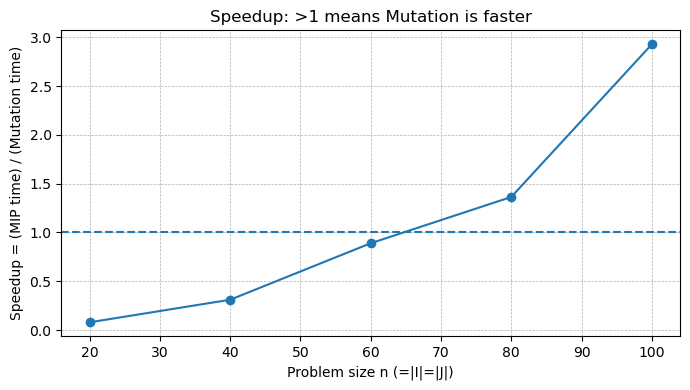

In [2]:
import matplotlib.pyplot as plt

df["speedup"] = df["time_mip"] / df["time_mut"]  # >1 なら Mutation の方が速い

spd = (df.groupby("n")["speedup"].mean().reset_index().sort_values("n"))

plt.figure(figsize=(7,4))
plt.plot(spd["n"], spd["speedup"], marker="o")
plt.axhline(1.0, linestyle="--")
plt.xlabel("Problem size n (=|I|=|J|)")
plt.ylabel("Speedup = (MIP time) / (Mutation time)")
plt.title("Speedup: >1 means Mutation is faster")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


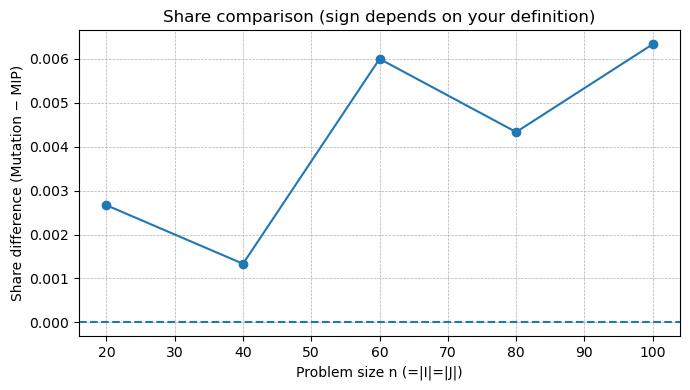

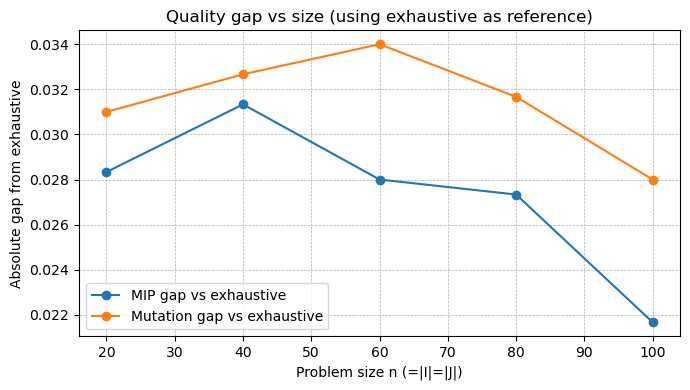

In [3]:
import matplotlib.pyplot as plt

# (A) Mutation - MIP（プラスならMutationの方がシェア率が大きい）
df["share_diff"] = df["share_mut"] - df["share_mip"]
sd = df.groupby("n")["share_diff"].mean().reset_index().sort_values("n")

plt.figure(figsize=(7,4))
plt.plot(sd["n"], sd["share_diff"], marker="o")
plt.axhline(0.0, linestyle="--")
plt.xlabel("Problem size n (=|I|=|J|)")
plt.ylabel("Share difference (Mutation − MIP)")
plt.title("Share comparison (sign depends on your definition)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# (B) 全探索を基準にしたギャップ（絶対値にすると“どれくらいズレるか”が一目）
df["gap_mip"] = (df["share_mip"] - df["share_exh"]).abs()
df["gap_mut"] = (df["share_mut"] - df["share_exh"]).abs()
gap = df.groupby("n")[["gap_mip","gap_mut"]].mean().reset_index().sort_values("n")

plt.figure(figsize=(7,4))
plt.plot(gap["n"], gap["gap_mip"], marker="o", label="MIP gap vs exhaustive")
plt.plot(gap["n"], gap["gap_mut"], marker="o", label="Mutation gap vs exhaustive")
plt.xlabel("Problem size n (=|I|=|J|)")
plt.ylabel("Absolute gap from exhaustive")
plt.title("Quality gap vs size (using exhaustive as reference)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


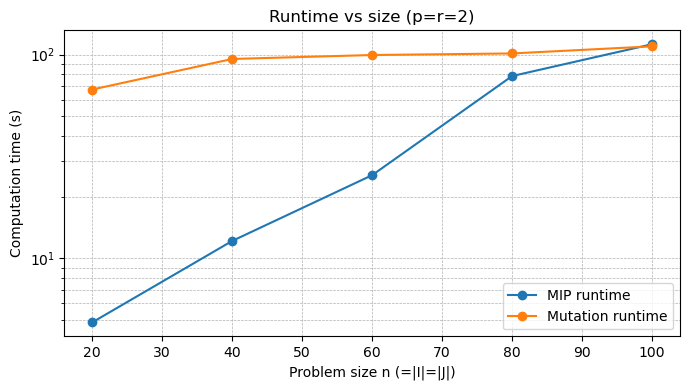

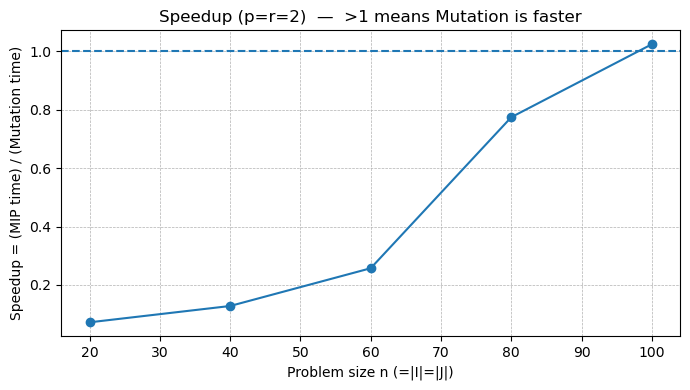

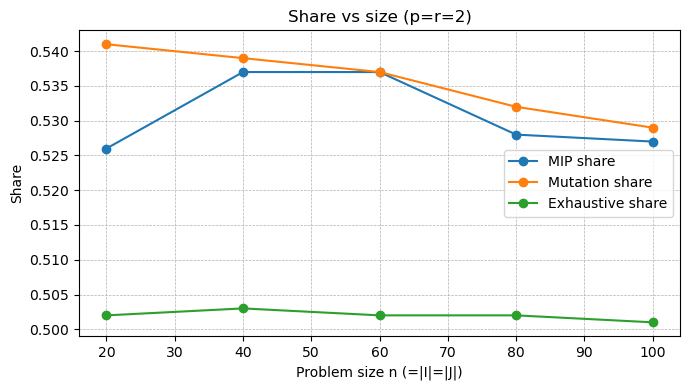

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- data ----------
data = [
("20-20-2-2",0.502,0.526,4.85,0.541,67.37),
("20-20-3-2",0.606,0.629,11.71,0.635,92.77),
("20-20-2-3",0.409,0.447,3.56,0.434,92.57),
("40-40-2-2",0.503,0.537,12.17,0.539,95.16),
("40-40-3-2",0.604,0.627,67.25,0.634,94.73),
("40-40-2-3",0.405,0.442,8.81,0.437,94.69),
("60-60-2-2",0.502,0.537,25.59,0.537,99.50),
("60-60-3-2",0.604,0.620,201.97,0.638,97.10),
("60-60-2-3",0.403,0.436,32.45,0.436,98.12),
("80-80-2-2",0.502,0.528,78.43,0.532,101.28),
("80-80-3-2",0.601,0.617,298.07,0.634,102.34),
("80-80-2-3",0.401,0.441,41.93,0.433,103.78),
("100-100-2-2",0.501,0.527,112.39,0.529,109.73),
("100-100-3-2",0.603,0.616,581.90,0.632,106.02),
("100-100-2-3",0.402,0.428,243.35,0.429,107.01),
]
df = pd.DataFrame(data, columns=["case","share_exh","share_mip","time_mip","share_mut","time_mut"])
parts = df["case"].str.split("-", expand=True).astype(int)
df["n"] = parts[0]   # |I|=|J|なので n=|I|
df["p"] = parts[2]
df["r"] = parts[3]

# ---------- filter: p=r=2 ----------
d = df[(df["p"]==2) & (df["r"]==2)].sort_values("n").reset_index(drop=True)

# ===== Plot 1: runtime vs size =====
plt.figure(figsize=(7,4))
plt.plot(d["n"], d["time_mip"], marker="o", label="MIP runtime")
plt.plot(d["n"], d["time_mut"], marker="o", label="Mutation runtime")

# 見やすいのでlog推奨（不要なら消してOK）
plt.yscale("log")

plt.xlabel("Problem size n (=|I|=|J|)")
plt.ylabel("Computation time (s)")
plt.title("Runtime vs size (p=r=2)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# ===== Plot 2: speedup (MIP/Mutation) =====
d["speedup"] = d["time_mip"] / d["time_mut"]   # >1 なら Mutationの方が速い
plt.figure(figsize=(7,4))
plt.plot(d["n"], d["speedup"], marker="o")
plt.axhline(1.0, linestyle="--")
plt.xlabel("Problem size n (=|I|=|J|)")
plt.ylabel("Speedup = (MIP time) / (Mutation time)")
plt.title("Speedup (p=r=2)  —  >1 means Mutation is faster")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# ===== Plot 3 (optional): share comparison =====
plt.figure(figsize=(7,4))
plt.plot(d["n"], d["share_mip"], marker="o", label="MIP share")
plt.plot(d["n"], d["share_mut"], marker="o", label="Mutation share")
plt.plot(d["n"], d["share_exh"], marker="o", label="Exhaustive share")
plt.xlabel("Problem size n (=|I|=|J|)")
plt.ylabel("Share")
plt.title("Share vs size (p=r=2)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()
